In [320]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

In [321]:
# Load data
data = pd.read_csv(r'D:\BA prac\HospitalityProject\guest_interactionss.csv')

In [322]:
print(data.columns)

Index(['review_id', 'guest_id', 'review_text', 'sentiment', 'booking_pattern',
       'satisfaction_score'],
      dtype='object')


In [323]:
# Step 2: Data preprocessing
# Clean and preprocess text data
data['review_text'] = data['review_text'].astype(str).str.lower().str.replace(r'[^a-z\s]', '', regex=True)
texts = data['review_text'].values
labels = data['sentiment'].values

In [324]:
print("NaN values in dataset:")
print(data.isnull().sum())

NaN values in dataset:
review_id             0
guest_id              0
review_text           0
sentiment             0
booking_pattern       0
satisfaction_score    0
dtype: int64


In [325]:
# Encode interaction types as numerical labels
interaction_types = list(set(labels))
label_dict = {interaction: i for i, interaction in enumerate(interaction_types)}
encoded_labels = np.array([label_dict[label] for label in labels])

In [326]:

# Step 3: Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [327]:
# Pad sequences for consistent input size
max_sequence_length = 100
X_text = pad_sequences(sequences, maxlen=max_sequence_length)

In [328]:
# Adding categorical features, ensure to process them properly
room_types_encoded = pd.get_dummies(data['booking_pattern']).values
X_combined = np.concatenate([X_text, room_types_encoded], axis=1)

In [329]:
# Use only text for simplicity in this iteration
X_combined = X_text

In [330]:
# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, encoded_labels, test_size=0.2, random_state=42)

In [331]:
# After splitting the data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5, 100)
X_test shape: (2, 100)
y_train shape: (5,)
y_test shape: (2,)


In [332]:
# Step 5: Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=256))
model.add(LSTM(128, return_sequences=True))  
model.add(Dropout(0.3)) 
model.add(LSTM(64))  
model.add(Dense(len(interaction_types), activation='softmax'))

In [333]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [334]:
# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=8, batch_size=32, validation_split=0.2)

Epoch 1/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.5000 - loss: 1.0971 - val_accuracy: 1.0000 - val_loss: 1.0476
Epoch 2/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.5000 - loss: 1.0693 - val_accuracy: 1.0000 - val_loss: 0.9907
Epoch 3/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.5000 - loss: 1.0386 - val_accuracy: 1.0000 - val_loss: 0.9161
Epoch 4/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.5000 - loss: 1.0088 - val_accuracy: 1.0000 - val_loss: 0.8231
Epoch 5/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.5000 - loss: 0.9638 - val_accuracy: 1.0000 - val_loss: 0.7070
Epoch 6/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.5000 - loss: 0.9340 - val_accuracy: 1.0000 - val_loss: 0.6170
Epoch 7/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.5000 - loss: 0.8928 - val_accuracy: 1.0000 - val_loss: 0.6260
Epoch 8/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.5000 - loss: 0.8644 - val_accuracy: 1.0000 - val_loss: 0.7517


In [335]:
# Step 8: Make predictions
def predict_interaction(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
    prediction = model.predict(padded_sequence)
    predicted_label = interaction_types[np.argmax(prediction)]
    return predicted_label

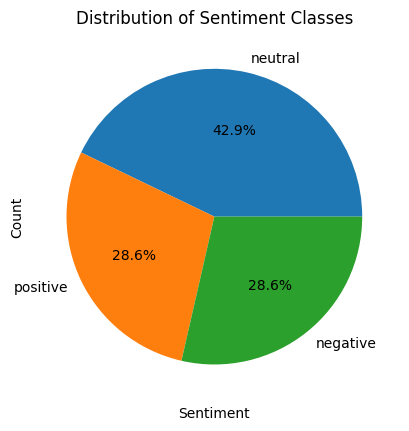

In [336]:
import matplotlib.pyplot as plt

# Plot the distribution of sentiment classes
data['sentiment'].value_counts().plot(kind='pie' , autopct='%1.1f%%')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
